In [1]:
import numpy as np 
import pandas as pd 
from scipy.interpolate import griddata
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter#, FixedLocatorfrom
from matplotlib import gridspec
import matplotlib.dates as mdates
import xarray as xr
import os
from datetime import datetime
import cmocean as cm
import gsw
from matplotlib.ticker import MaxNLocator
from scipy import stats
from datetime import datetime, timedelta

In [2]:
path = "/Users/calebflaim/Documents/thesis/openFloat_thesis/data/glider_dives/"
deployments = sorted(os.listdir(path))
deployments.remove('.DS_Store')
print(deployments)

for deployment in deployments:
    files = sorted(os.listdir(path+deployment+'/'))
    for file in files:
        print(file)
        # ds = xr.open_dataset(path+deployment+'/'+file)
        # display(ds)

['colvos1', 'colvos2']
p1750001.nc
p1750002.nc
p1750003.nc
p1750004.nc
p1750005.nc
p1750006.nc
p1750007.nc
p1750008.nc
p1750009.nc
p1750001.nc
p1750002.nc
p1750003.nc
p1750004.nc
p1750005.nc
p1750006.nc
p1750007.nc


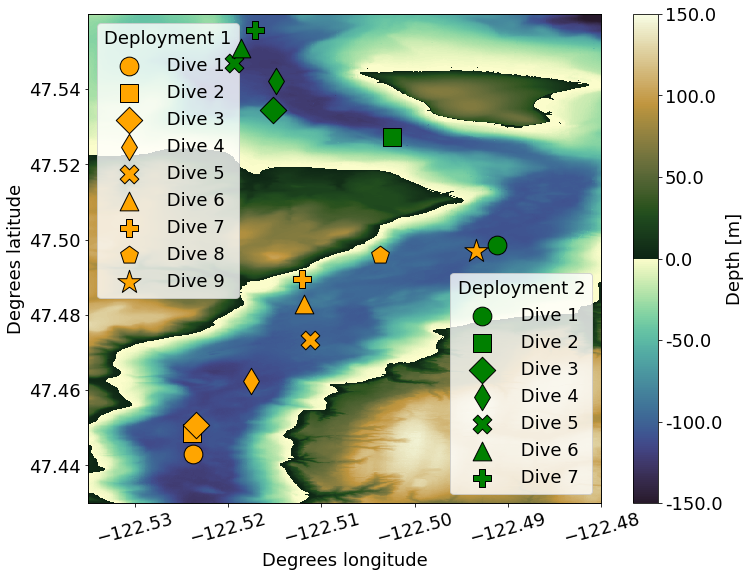

In [3]:
fontsize = 18

path = "/Users/calebflaim/Documents/thesis/openFloat_thesis/data/glider_dives/"
deployments = sorted(os.listdir(path))
deployments.remove('.DS_Store')

bathy_path = "/Users/calebflaim/Documents/thesis/data/puget_sound_13_navd88_2014.nc"
bathy = xr.open_dataset(bathy_path)

lonMin = -122.535
lonMax = -122.48
latMin = 47.43
latMax = 47.56

# It saves a lot of time waiting if you limit the bathymetry data set in the beginning!
bathy2 = bathy.sel(lon=slice(lonMin,lonMax))
bathy = bathy2.sel(lat=slice(latMin,latMax))
scatter_markers = ['o', 's', 'D', 'd', 'X', '^', 'P', 'p', '*']
# display(bathy)

fig, ax = plt.subplots(figsize = (11.5, 9))
plot = plt.pcolormesh(bathy['lon'],bathy['lat'],bathy['Band1'],cmap=cm.cm.topo, vmin = -150, vmax = 150, shading='nearest')
y2 = ax.twinx()
for deployment in deployments:
    files = sorted(os.listdir(path+deployment+'/'))
    for i, file in enumerate(files):
        data_set = xr.open_dataset(path+deployment+'/'+file)

        if "1" in deployment:
            if i < 8:
                ax.scatter(data_set['log_gps_lon'][1], data_set['log_gps_lat'][1], s = 350, marker=scatter_markers[i], c = 'orange', edgecolors = 'k', linewidths = 1, label = f" Dive {file[-4]}")

            else:
                ax.scatter(data_set['log_gps_lon'][1], data_set['log_gps_lat'][1], s = 600, marker=scatter_markers[i], c = 'orange',edgecolors = 'k', linewidths = 1, label = f" Dive {file[-4]}")

        else:
            if i < 8:
                y2.scatter(data_set['log_gps_lon'][1], data_set['log_gps_lat'][1], s = 350, marker=scatter_markers[i], c = 'green', edgecolors = 'k', linewidths = 1, label = f" Dive {file[-4]}")

            else:
                y2.scatter(data_set['log_gps_lon'][1], data_set['log_gps_lat'][1], s = 600, marker=scatter_markers[i], c = 'green',edgecolors = 'k', linewidths = 1, label = f" Dive {file[-4]}")

y2.axes.get_xaxis().set_visible(False)
y2.axes.get_yaxis().set_visible(False)
y2.set_ylim([latMin, latMax])
y2.set_xlim([lonMin, lonMax])

cbar = fig.colorbar(plot)
cbar.set_label("Depth [m]", fontsize = fontsize)
ticks = cbar.ax.get_yticks()
cbar.ax.set_yticks(ticks)
cbar.ax.set_yticklabels(ticks, fontsize=fontsize)

ax.set_ylabel("Degrees latitude",  fontsize=fontsize)
ax.set_xlabel("Degrees longitude", fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

for tick in ax.get_xticklabels():
    tick.set_rotation(15)

ax.legend(title='Deployment 1', fontsize=18, title_fontsize=18)
y2.legend(title='Deployment 2',fontsize=18, title_fontsize=18, loc = 'lower right')

# plt.savefig("/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/deploymentPlot.png")
plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/paper/deploymentPlot.png')
plt.show()

10.847759791289592 10.919888484974097 30.30949306765567 30.420810692344183
9.205089259455 9.309223630387866 29.016482627060558 29.70722961257082


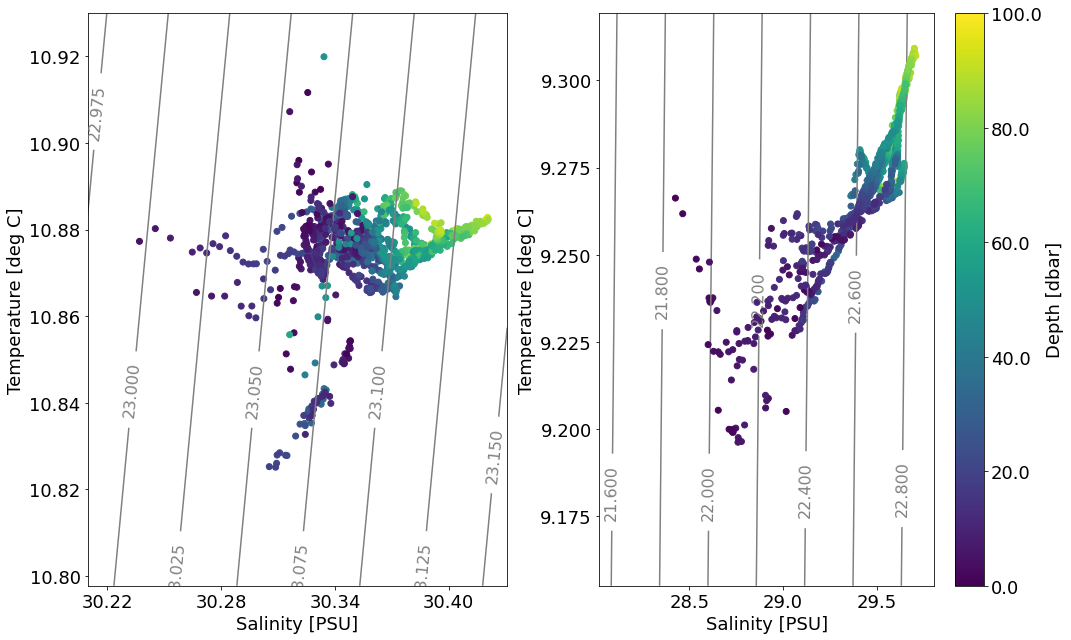

In [4]:
data_path = '/Users/calebflaim/Documents/thesis/openFloat_thesis/data/glider_dives/'
depoyments = os.listdir(data_path)
if '.DS_Store' in deployments: deployments.remove('.DS_Store')
# .remove('.DS_Store') # remove b/c I am bad at GIT
# deployments = sorted(files)
# print(files)

fig,axs=plt.subplots(1,len(deployments), figsize=(15,9))

# vals for finding mins and maxes
max_t = 1
min_t = 1000
max_s = 1
min_s = 1000
letters = ['a)', 'b)']

for i, deployment in enumerate(deployments):
    files = sorted(os.listdir(path+deployment+'/'))
    if '.DS_Store' in files: files.remove('.DS_Store')
    for file in files:
        ds = xr.open_dataset(data_path+deployment+'/'+file)
        df = pd.DataFrame()

        t = ds['temperature'].values
        s = ds["absolute_salinity"].values
        d = ds['depth'].values
        df["temp"] = t
        df["sal"] = s
        df['depth'] = d
        df = df.dropna()

        if np.max(df['temp'] > max_t): max_t = np.max(df['temp'])
        if np.min(df['temp'] < min_t): min_t = np.min(df['temp'])
        if np.max(df['sal'] > max_s): max_s = np.max(df['sal'])
        if np.min(df['sal'] < min_s): min_s = np.min(df['sal'])

        if "0009" in file and i == 0:
            mint=min_t
            maxt=max_t

            mins=min_s
            maxs=max_s
            print(mint, maxt, mins, maxs)
            tempL=np.linspace(mint-.05,maxt+.01,len(df["temp"]))

            salL=np.linspace(mins-.1,maxs+.01,len(df["sal"]))

            Tg, Sg = np.meshgrid(tempL,salL)
            sigma_theta = gsw.sigma0(Sg, Tg)
            # cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),len(df["temp"]))

            #fig.suptitle('programmer:Hafez Ahmad', fontsize=14, fontweight='bold')
            cs = axs[i].contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
            cl=plt.clabel(cs,fontsize=16,inline=True,fmt='%.3f')

        if "0007" in file and i == 1:
            mint=min_t
            maxt=max_t

            mins=min_s
            maxs=max_s
            print(mint, maxt, mins, maxs)
            tempL=np.linspace(mint-.05,maxt+.01,len(df["temp"]))

            salL=np.linspace(mins-1,maxs+.1,len(df["sal"]))

            Tg, Sg = np.meshgrid(tempL,salL)
            sigma_theta = gsw.sigma0(Sg, Tg)
            # cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),len(df["temp"]))

            #fig.suptitle('programmer:Hafez Ahmad', fontsize=14, fontweight='bold')
            cs = axs[i].contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
            cl=plt.clabel(cs,fontsize=16,inline=True,fmt='%.3f')

        sc=axs[i].scatter(df["sal"].values, df['temp'].values, c=df['depth'], vmin=0, vmax=100)
    max_t = 1
    min_t = 1000
    max_s = 1
    min_s = 1000

    # axs[i].set_title(f"{letters[i]} Colvos deployment {deployment[-1]}", fontsize = 18)
    axs[i].set_xlabel('Salinity [PSU]', fontsize=18)

    axs[i].set_ylabel('Temperature [deg C]', fontsize = 18) # [$^\circ$C]
    # ax.set_title('General T-S (Temperature and salinity) Diagram',fontsize=14, fontweight='bold')
    axs[i].xaxis.set_major_locator(MaxNLocator(nbins=4))
    axs[i].yaxis.set_major_locator(MaxNLocator(nbins=8))
    axs[i].tick_params(direction='out')
    axs[i].tick_params(labelsize=18)

cb=plt.colorbar(sc)
cb.ax.tick_params(direction='out')
cb.set_label('Depth [dbar]', fontsize=18)
ticks = cb.ax.get_yticks()
cb.ax.set_yticks(ticks)
cb.ax.set_yticklabels(ticks, fontsize=18)
plt.tight_layout()
# plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/both_deployment_ts_diagram.png',transparent=False)
plt.show()

In [5]:
# sal_est = [30.0986, 30.2981, 30.3621, 30.1244, 30.0577, 30.1052, 30.2946, 30.0954, 30.1014]
# expected_sal  = []
# data_path = "/Users/calebflaim/Documents/thesis/openFloat/code/dataAnalysisScripts/initialGliderAnalysis/glider_dives/"
# files = os.listdir(data_path)
# files.remove('.DS_Store')
# files = sorted(files, key=lambda x: int(x[-4]))

# fig, ax = plt.subplots(figsize=(11.5, 10))
# plots = []
# line_styles = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 1, 1, 1, 1, 1))]
# scatter_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*']
# for i, file in enumerate(files):
#     ds = xr.open_dataset(data_path +file)
#     df = pd.DataFrame()
#     temp = ds['temperature'].values
#     s = ds["absolute_salinity"].values
#     d = ds['depth'].values
#     t = ds['time'].values
#     df['time'] = t
#     df["temp"] = temp
#     df["sal"] = s
#     df['depth'] = d
#     df = df.dropna()


#     max_depth = np.max(df['depth'])
#     max_depth_data = df.query('depth == @max_depth')
#     expected_sal.append(max_depth_data['sal'].values)
#     plots += ax.plot(df['time'], df['sal'], label = f"Dive {file[-4]} measured", linewidth=2)
#     ax.scatter(max_depth_data['time'], sal_est[i], marker=scatter_markers[i], s = 100, label = "estimate")

# print(expected_sal)
# # labels = [l.get_label() for l in plots]
# ax.set_ylabel("Salinity [PSU]",  fontsize=18)
# ax.set_xlabel("Time", fontsize=18)
# ax.tick_params(labelsize=18)
# fig.legend(fontsize=16, ncol=2, loc='center right', bbox_to_anchor=(1.32, 0.5))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
# for tick in ax.get_xticklabels():
#     tick.set_rotation(15)
# # ax.legend(fontsize=16)
# # plt.tight_layout()
    
# plt.show()

In [6]:
data_path = "/Users/calebflaim/Documents/thesis/openFloat_thesis/data/glider_dives/"
save_path = '/Users/calebflaim/Documents/thesis/openFloat_thesis/data/intermediateData/buoyancyDataCsv/'
deployments = sorted(os.listdir(data_path))
if '.DS_Store' in depoyments: deployments.remove('.DS_Store') # remove b/c idk how to use GIT 
for deployment in deployments:
    files = sorted(os.listdir(data_path+deployment))

    if '.DS_Store' in files: files.remove('.DS_Store') # remove b/c idk how to use GIT 
    t = []
    d = []
    p = []
    print(deployment)
    for file in files:
        print(file)
        data_set = xr.open_dataset(data_path+deployment+'/'+file) # load in data
        # display(data_set)
        vbd_min = -data_set['log_VBD_MIN'].values*data_set['log_VBD_CNV'].values # get VBD min volume
        vbd_max = -data_set['log_VBD_MAX'].values*data_set['log_VBD_CNV'].values # get VBD max volume
        # print("vbd min: ", vbd_min)
        # print("vbd max: ", vbd_max)

        glider_mass = data_set['log_MASS'].values # get glider mass
        # print("Glider mass: ", glider_mass)

        glider_base_vol = data_set['sg_cal_volmax'].values + data_set['log_VBD_MAX'].values*data_set['log_VBD_CNV'].values # calculate glider base volume
        # print("glider volume: ", glider_base_vol)

        dive_vbd = -np.min(data_set['eng_vbdCC'].values) # calculate bladder vol for dive
        apogee_vbd = -data_set['log_C_VBD'].values*data_set['log_VBD_CNV'].values # get bladder vol at neutral buoyancy
        climb_vbd = np.max(data_set['eng_vbdCC'].values)# calculate bladder vol for climb
        # print("dive vbd: ", dive_vbd)
        # print('Apogee vbd: ', apogee_vbd)
        # print("climb vbd: ", climb_vbd)

        # calculated densities for three dive stages of interest
        dive_density = glider_mass/(glider_base_vol + dive_vbd )
        apogee_density = glider_mass/(glider_base_vol + (vbd_max - apogee_vbd))
        climb_density = glider_mass/(glider_base_vol + climb_vbd+ dive_vbd )

        # print("glider dive density: ", dive_density)
        # print("glider density at dive min: ", apogee_density) # subtract C_VBD from VBD_MAX since C_VBD is not centered around 0
        # print("glider climb density: ", climb_density) # adds climmb vbd to dive vbd since there is a sign change
        print()

        t.append(np.min(data_set['temperature'].values))
        d.append(apogee_density)
        p.append(np.max(data_set['depth'].values))
    # print(t, d, p)
    df = pd.DataFrame({"temperature": t, "density": d, 'pressure': p})
    df.to_csv(save_path+deployment+"/gliderNeutralBuoyancy.csv")
    print()
    print()

colvos1
p1750001.nc

p1750002.nc

p1750003.nc

p1750004.nc

p1750005.nc

p1750006.nc

p1750007.nc

p1750008.nc

p1750009.nc



colvos2
p1750001.nc

p1750002.nc

p1750003.nc

p1750004.nc

p1750005.nc

p1750006.nc

p1750007.nc





[0.09306126454295216, 0.08797490172391978]


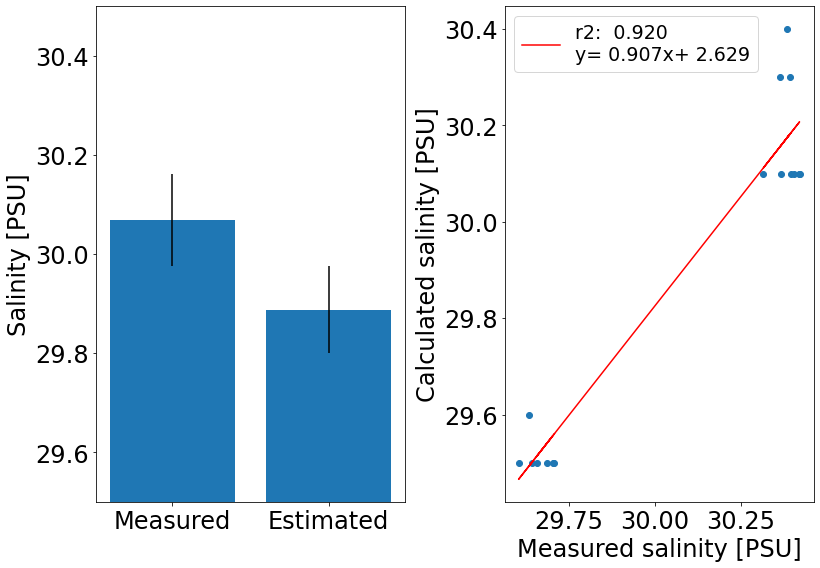

Ttest_indResult(statistic=1.4123972216168716, pvalue=0.1681233008913683)
[30.068375, 29.887500000000003]
4.708005160437284e-09


In [7]:
fontsize = 24
data_path = "/Users/calebflaim/Documents/thesis/openFloat_thesis/data/glider_dives/"
deployments = sorted(os.listdir(data_path))
if '.DS_Store' in deployments: deployments.remove('.DS_Store')

colvos1_sal = [30.0986, 30.2981, 30.3621, 30.1244, 30.0577, 30.1052, 30.2946, 30.0954, 30.1014]
colvos2_sal = [29.4814, 29.4958, 29.6399, 29.5007, 29.4818, 29.4845, 29.4868]
# shilshole1_sal = [30.4097, 29.9949, 29.6367, 29.3198]
# shilshole2_sal = [30.2946, 30.0577, 30.1244, 30.1014, 30.0954, 30.1052, 30.3621, 30.2981, 30.0986]
# shilshole3_sal = [29.6528, 29.2023, 29.1796, 29.4725, 29.4538]

colvos = [colvos1_sal, colvos2_sal]

expected_sal  = []
estimated_sal = []

fig, axs = plt.subplots(1,2,figsize=(11.5, 8))
plots = []
line_styles = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 1, 1, 1, 1, 1))]
scatter_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*']

for j, deployment in enumerate(deployments):
    files = os.listdir(data_path+deployment)
    if '.DS_Store' in files: files.remove('.DS_Store')
    files = sorted(files)

    for i, file in enumerate(files):
        # if j==len(colvos)-1 and i ==5: break
        ds = xr.open_dataset(data_path+deployment+'/'+file)
        df = pd.DataFrame()
        temp = ds['temperature'].values
        s = ds["absolute_salinity"].values
        d = ds['depth'].values
        t = ds['time'].values
        df['time'] = t
        df["temp"] = temp
        df["sal"] = s
        df['depth'] = d
        df = df.dropna()

        max_depth = np.max(df['depth'])
        max_depth_data = df.query('depth == @max_depth')
        expected_sal.append(float(max_depth_data['sal'].values))
        estimated_sal.append(colvos[j][i])
        
        # plots += ax.plot(df['time'], df['sal'], label = f"Dive {file[-4]} measured", linewidth=2)
        # ax.scatter(max_depth_data['time'], colvos[j][i], marker=scatter_markers[i], s = 100, label = "estimate")

expected_sal = np.round(np.array(expected_sal), 3)
estimated_sal = np.round(np.array(estimated_sal), 1)
categories = ['Measured', 'Estimated']
means = [np.mean(expected_sal), np.mean(estimated_sal)]
std_errs = [np.std(expected_sal, ddof=1)/np.sqrt(len(expected_sal)), np.std(estimated_sal, ddof=1)/np.sqrt(len(estimated_sal))]
print(std_errs)
slope, intercept, r_value, p_value, std_err = stats.linregress(expected_sal, estimated_sal)
axs[0].bar(categories, means, yerr=std_errs)
axs[0].set_ylim([29.5, 30.5])
axs[0].set_ylabel("Salinity [PSU]", fontsize=fontsize)
axs[0].tick_params(labelsize=fontsize)
axs[1].tick_params(labelsize=fontsize)
axs[1].scatter(expected_sal, estimated_sal)
axs[1].plot(expected_sal, intercept+slope*expected_sal, c='r', label = f"r2: {r_value**2: .3f}\ny={slope: .3f}x+{intercept: .3f}")
axs[1].set_xlabel("Measured salinity [PSU]", fontsize=fontsize)
axs[1].set_ylabel("Calculated salinity [PSU]", fontsize=fontsize)
axs[1].legend(fontsize=fontsize-5, loc='upper left')

plt.tight_layout()
# plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/statisticsPlot.tiff')
# plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/presentation/gliderDataStats.png')
plt.show()

print(stats.ttest_ind(expected_sal, estimated_sal))
print(means)
print(p_value)

30.384859531933508
30.170833333333334
30.06844116186327
29.881774999999998
est sal mean:  29.887500000000003 std dev:  0.3407253292609755
True sal mean:  30.068375 std dev:  0.36042472775185647
true - est sal mean:  0.18087499999999945 std dev:  0.10230033907568425
[0.09306126454295216, 0.08797490172391978]


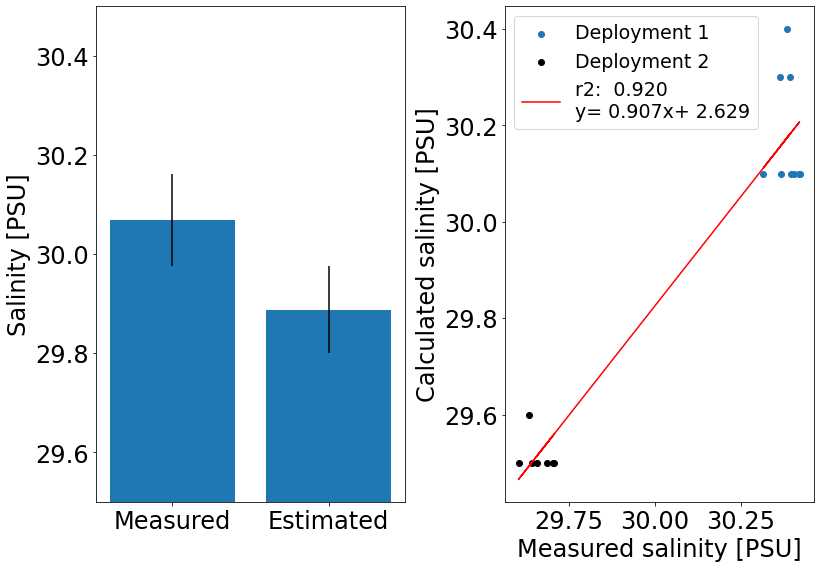

Ttest_indResult(statistic=1.4123972216168716, pvalue=0.1681233008913683)
[30.068375, 29.887500000000003]
4.708005160437284e-09


In [8]:
fontsize = 24

data_path = "/Users/calebflaim/Documents/thesis/openFloat_thesis/data/glider_dives/"
deployments = sorted(os.listdir(data_path))
if '.DS_Store' in deployments: deployments.remove('.DS_Store')

colvos1_sal = [30.0986, 30.2981, 30.3621, 30.1244, 30.0577, 30.1052, 30.2946, 30.0954, 30.1014]
colvos2_sal = [29.4814, 29.4958, 29.6399, 29.5007, 29.4818, 29.4845, 29.4868]
# shilshole1_sal = [30.4097, 29.9949, 29.6367, 29.3198]
# shilshole2_sal = [30.2946, 30.0577, 30.1244, 30.1014, 30.0954, 30.1052, 30.3621, 30.2981, 30.0986]
# shilshole3_sal = [29.6528, 29.2023, 29.1796, 29.4725, 29.4538]

colvos = [colvos1_sal, colvos2_sal]

expected_sal  = []
estimated_sal = []
depths = []

fig, axs = plt.subplots(1,2,figsize=(11.5, 8))
plots = []
line_styles = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 1, 1, 1, 1, 1))]
scatter_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*']

for j, deployment in enumerate(deployments):
    files = os.listdir(data_path+deployment)
    if '.DS_Store' in files: files.remove('.DS_Store')
    files = sorted(files)

    for i, file in enumerate(files):
        # if j==len(colvos)-1 and i ==5: break
        ds = xr.open_dataset(data_path+deployment+'/'+file)
        df = pd.DataFrame()
        temp = ds['temperature'].values
        s = ds["absolute_salinity"].values
        d = ds['depth'].values
        t = ds['time'].values
        df['time'] = t
        df["temp"] = temp
        df["sal"] = s
        df['depth'] = d
        df = df.dropna()

        max_depth = np.max(df['depth'])
        depths.append(max_depth)
        max_depth_data = df.query('depth == @max_depth')
        expected_sal.append(float(max_depth_data['sal'].values))
        estimated_sal.append(colvos[j][i])
    print(np.mean(expected_sal))
    print(np.mean(estimated_sal))
        # plots += ax.plot(df['time'], df['sal'], label = f"Dive {file[-4]} measured", linewidth=2)
        # ax.scatter(max_depth_data['time'], colvos[j][i], marker=scatter_markers[i], s = 100, label = "estimate")

eestimated_sal = gsw.SP_from_SA(estimated_sal, depths, -122.48, 47.43)

expected_sal = np.round(np.array(expected_sal), 3)
estimated_sal = np.round(np.array(estimated_sal), 1)


print("est sal mean: ", np.mean(estimated_sal), "std dev: ", np.std(estimated_sal))
print("True sal mean: ", np.mean(expected_sal), "std dev: ", np.std(expected_sal))
print("true - est sal mean: ", np.mean(expected_sal - estimated_sal), "std dev: ", np.std(expected_sal - estimated_sal))

categories = ['Measured', 'Estimated']
means = [np.mean(expected_sal), np.mean(estimated_sal)]
std_errs = [np.std(expected_sal, ddof=1)/np.sqrt(len(expected_sal)), np.std(estimated_sal, ddof=1)/np.sqrt(len(estimated_sal))]
print(std_errs)
slope, intercept, r_value, p_value, std_err = stats.linregress(expected_sal, estimated_sal)
axs[0].bar(categories, means, yerr=std_errs)
axs[0].set_ylim([29.5, 30.5])
axs[0].set_ylabel("Salinity [PSU]", fontsize=fontsize)
axs[0].tick_params(labelsize=fontsize)
axs[1].tick_params(labelsize=fontsize)
axs[1].scatter(expected_sal[0:9], estimated_sal[0:9], label='Deployment 1')
axs[1].scatter(expected_sal[9:], estimated_sal[9:], c='k', label="Deployment 2")
axs[1].plot(expected_sal, intercept+slope*expected_sal, c='r', label = f"r2: {r_value**2: .3f}\ny={slope: .3f}x+{intercept: .3f}")
axs[1].set_xlabel("Measured salinity [PSU]", fontsize=fontsize)
axs[1].set_ylabel("Calculated salinity [PSU]", fontsize=fontsize)
axs[1].legend(fontsize=fontsize-5, loc='upper left')

plt.tight_layout()
# plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/statisticsPlot.png')
# plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/presentation/gliderDataStats.png')
plt.show()

print(stats.ttest_ind(expected_sal, estimated_sal))
print(means)
print(p_value)

<ipython-input-9-0cbb71ddef84>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticks, fontsize=18)
<ipython-input-9-0cbb71ddef84>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticks, fontsize=18)


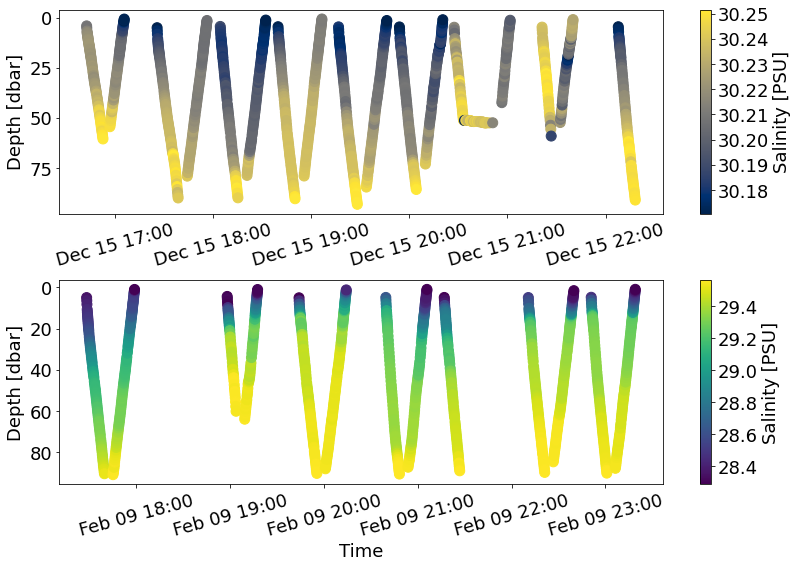

In [9]:
data_path = "/Users/calebflaim/Documents/thesis/openFloat_thesis/data/glider_dives/"
deployments = sorted(os.listdir(data_path))
if '.DS_Store' in deployments: deployments.remove('.DS_Store')

fig, axs = plt.subplots(2,1,figsize=(11.5, 8))
plots = [0,0]

scalar_formatter = ScalarFormatter(useOffset=False)
for j, deployment in enumerate(deployments):
    files = os.listdir(data_path+deployment)
    if '.DS_Store' in files: files.remove('.DS_Store')
    files = sorted(files)

    for i, file in enumerate(files):
        ds = xr.open_dataset(data_path+deployment+'/'+file)
        if j ==0:
         sc = axs[j].scatter(ds['time'], ds['depth'].values, c=ds['salinity'].values,cmap='cividis', s=100)
        else:
           sc = axs[j].scatter(ds['time'], ds['depth'].values, c=ds['salinity'].values, s=100)
        plots[j]=sc
        axs[j].yaxis.set_major_formatter(scalar_formatter)
        axs[j].xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
        # plots += ax.plot(df['time'], df['sal'], label = f"Dive {file[-4]} measured", linewidth=2)
        # ax.scatter(max_depth_data['time'], colvos[j][i], marker=scatter_markers[i], s = 100, label = "estimate")
    cbar = plt.colorbar(plots[j], ax=axs[j])
    ticks = cbar.ax.get_yticks()
    # cbar.ax.set_yticks(ticks)
    cbar.ax.set_yticklabels(ticks, fontsize=18)
    cbar.formatter = scalar_formatter
    cbar.update_ticks()
    cbar.set_label('Salinity [PSU]', fontsize=18)
    for tick in axs[j].get_xticklabels():
        tick.set_rotation(15)

axs[0].set_ylabel("Depth [dbar]", fontsize=18)
axs[1].set_ylabel("Depth [dbar]", fontsize=18)
axs[0].tick_params(labelsize=18)
axs[1].tick_params(labelsize=18)
axs[1].set_xlabel("Time", fontsize=18)
# axs[1].set_ylabel("Calculated salinity [PSU]", fontsize=18)
# axs[1].legend(fontsize=16, loc='lower right')
axs[0].invert_yaxis(); axs[1].invert_yaxis()
plt.tight_layout()
plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/divesSalinity.png')
plt.show()



In [10]:
true_sal = np.array([34.54, 34.65, 34.67, 34.67, 
            34.67, 34.68, 34.68, 34.68, 
            34.68, 34.68, 34.68, 34.68, 
            34.68, 34.68, 34.68, 34.68])*0.966557124

true_temp = [21.774, 21.823, 21.825, 21.825, 
             21.825, 21.825, 21.825, 21.825, 
             21.824, 21.823, 21.824, 21.824, 
             21.82, 21.823, 21.822, 21.822]

float_press = np.array([1046.38, 1046.52, 1046.85, 1046.95, 1047.02, 1047.06, 
               1047.4, 1047.19, 1047.26, 1047.36, 1047.39, 1047.46, 
               1047.8, 1048.14, 1048.17,1047.93])/100
mass = 10818 #g
mass = np.zeros(len(true_sal))+mass
print(mass)
rho =gsw.rho_t_exact(true_sal, true_temp, float_press) 
print(rho)

[10818. 10818. 10818. 10818. 10818. 10818. 10818. 10818. 10818. 10818.
 10818. 10818. 10818. 10818. 10818. 10818.]
[1022.98468803 1023.05147504 1023.06554105 1023.0655454  1023.06554845
 1023.07285287 1023.07286768 1023.07285854 1023.07313845 1023.07341966
 1023.07314411 1023.07314716 1023.07426934 1023.07345363 1023.07373179
 1023.07372133]


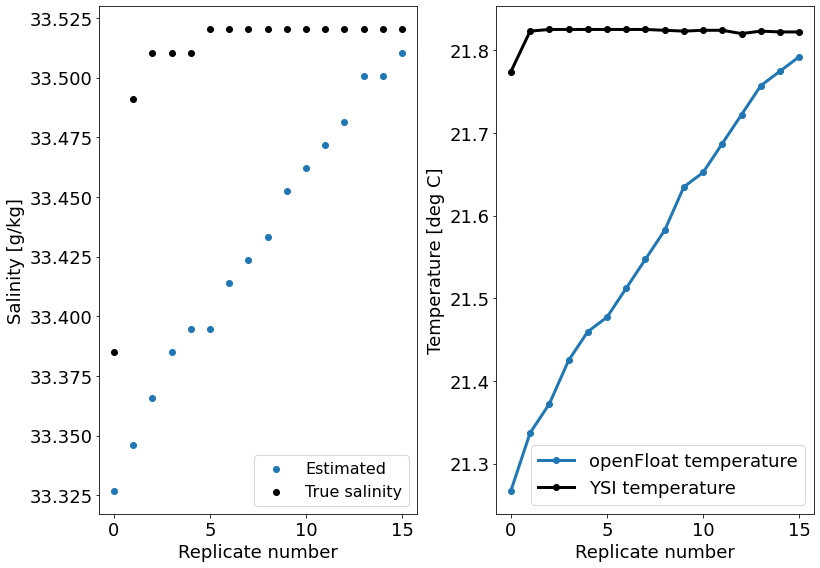

In [11]:
float_press = np.array([1046.38, 1046.52, 1046.85, 1046.95, 1047.02, 1047.06, 
               1047.4, 1047.19, 1047.26, 1047.36, 1047.39, 1047.46, 
               1047.8, 1048.14, 1048.17,1047.93])
float_press = float_press/1000

float_temp = [21.2672, 21.3372, 21.3722, 21.4247, 
              21.4596, 21.4771, 21.5121, 21.5471,
              21.5821, 21.6346, 21.6521, 21.6871,
              21.722, 21.757, 21.7745, 21.792]
true_temp = [21.774, 21.823, 21.825, 21.825, 
             21.825, 21.825, 21.825, 21.825, 
             21.824, 21.823, 21.824, 21.824, 
             21.82, 21.823, 21.822, 21.822]
float_density = [1023.91, 1023.91, 1023.91, 1023.91, 
                1023.91, 1023.91, 1023.91, 1023.91,
                1023.91, 1023.91, 1023.91, 1023.91,
                1023.91, 1023.91, 1023.91, 1023.91]


float_sal_est = [34.4786591495173, 34.5039890595895, 34.5166752042411, 34.5357350297077, 
                 34.5484240570326, 34.5547923708133, 34.5675388164691, 34.5803035071647, 
                 34.5930816568762, 34.6122771493284, 34.6186831921973, 34.6315065033480, 
                 34.6443065941536, 34.6571583742051, 34.6635907028965, 34.6700283390946]
float_sal_est = [round(float_sal_est[i], 2) for i in range(len(float_sal_est))]

true_sal = [34.54, 34.65, 34.67, 34.67, 
            34.67, 34.68, 34.68, 34.68, 
            34.68, 34.68, 34.68, 34.68, 
            34.68, 34.68, 34.68, 34.68]

fig, axs = plt.subplots(1,2, figsize=(11.5, 8))

axs[0].scatter(np.arange(0, len(true_sal)), np.array(float_sal_est)*0.966557124, label='Estimated')
axs[0].scatter(np.arange(0, len(true_sal)), np.array(true_sal)*0.966557124, c='k',label='True salinity')
# axs[0].hlines(np.mean(true_sal), xmin = 0, xmax=35, color='k', label="True salinity mean")
# axs[0].hlines(np.mean(float_sal_est), xmin = 0, xmax=35,label="Estimated salinity mean")

axs[0].set_ylabel("Salinity [g/kg]", fontsize=18)
axs[0].set_xlabel("Replicate number", fontsize=18)

axs[0].tick_params(labelsize=18)
axs[0].legend(fontsize=16, loc='best')

axs[1].plot(np.arange(0, len(float_temp)), float_temp, marker='o', linewidth=3, label='openFloat temperature')
axs[1].plot(np.arange(0, len(float_temp)), true_temp, marker='o',linewidth=3, c='k', label='YSI temperature')
axs[1].set_ylabel("Temperature [deg C]", fontsize=18)
axs[1].set_xlabel("Replicate number", fontsize=18)
axs[1].tick_params(labelsize=18)
axs[1].legend(fontsize=18)

plt.tight_layout()
plt.show()

20.41727586206897


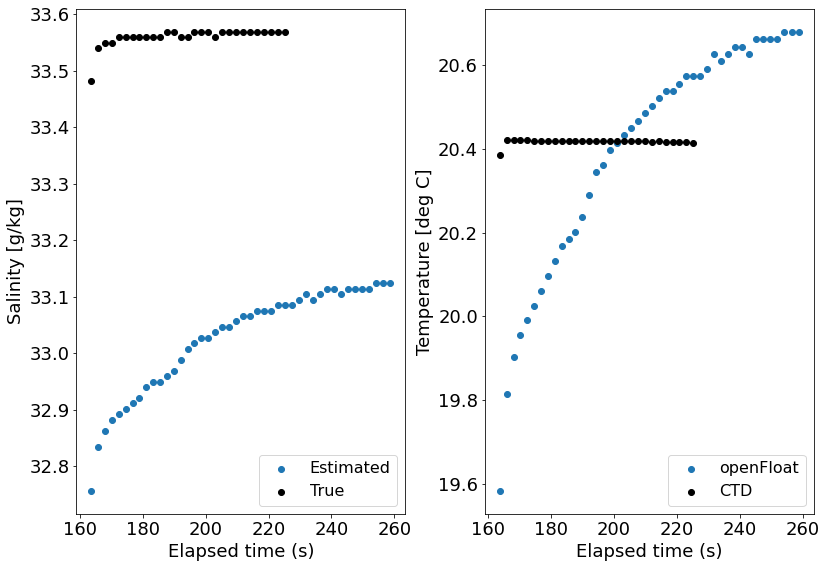

In [12]:
data_path = '/Users/calebflaim/Documents/thesis/openFloat_thesis/data/floatTankData.csv'
ysi_path = '/Users/calebflaim/Documents/thesis/openFloat_thesis/data/Kor Measurement File Export - 022424 173637.csv'

float_df = pd.read_csv(data_path)
ysi_df = pd.read_csv(ysi_path)
print(np.mean(ysi_df['Temp_C']))
sal_est = [33.8877, 33.9664, 33.9968, 34.0150, 34.0273, 
           34.0395, 34.0517, 34.0639, 34.0762, 34.0885, 
           34.0946, 34.1008, 34.1131, 34.1316, 34.1501, 
           34.1563, 34.1687, 34.1749, 34.1811, 34.1873, 
           34.1935, 34.1997, 34.2059, 34.2121, 34.2184, 
           34.2184, 34.2246, 34.2308, 34.2308, 34.2308, 
           34.2370, 34.2495, 34.2433, 34.2495, 34.2558, 
           34.2558, 34.2495, 34.2620, 34.2620, 34.2620, 
           34.2620, 34.2683, 34.2683, 34.2683]

sal_est = [round(sal_est[i], 2) for i in range(len(sal_est))]

fig, axs = plt.subplots(1,2, figsize=(11.5, 8))

axs[0].scatter(float_df['time']/1000, np.array(sal_est)*0.966557124, label='Estimated')
axs[0].scatter(float_df['time'][0:len(ysi_df['Sal_psu'])]/1000, ysi_df['Sal_psu']*0.966557124, c='k',label='True')
# axs[0].hlines(np.mean(true_sal), xmin = 0, xmax=35, color='k', label="True salinity mean")
# axs[0].hlines(np.mean(float_sal_est), xmin = 0, xmax=35,label="Estimated salinity mean")

axs[0].set_ylabel("Salinity [g/kg]", fontsize=18)
axs[0].set_xlabel("Elapsed time (s)", fontsize=18)

axs[0].tick_params(labelsize=18)
axs[0].legend(fontsize=16, loc='best')
# print(float_df['temperature'])
axs[1].scatter(float_df['time']/1000, float_df['temperature'], label='openFloat')
axs[1].scatter(float_df['time'][0:len(ysi_df['Sal_psu'])]/1000, ysi_df['Temp_C'], c='k',label='CTD')
axs[1].set_ylabel("Temperature [deg C]", fontsize=18)
axs[1].set_xlabel("Elapsed time (s)", fontsize=18)
axs[1].tick_params(labelsize=18)
axs[1].legend(fontsize=16, loc='lower right')

plt.tight_layout()
plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/openFloatSal.tiff')
plt.show()

In [13]:
data_path = '/Users/calebflaim/Documents/thesis/openFloat_thesis/data/tankData3.csv'
ysi_path = '/Users/calebflaim/Documents/thesis/openFloat_thesis/data/Kor Measurement File Export - 022724 173204.csv'

float_df = pd.read_csv(data_path)
ysi_df = pd.read_csv(ysi_path)
# display(float_df)


press_true = np.mean(float_df[' pressure']-1014.5)/100
# print(press_true)
temp_true = np.mean(ysi_df['Temp_C'])
sal_true = np.mean(ysi_df['Sal_psu'])*0.966557124

rho = gsw.rho_t_exact(sal_true, temp_true, press_true)
# print(rho)
mass = 10818
vol = mass/(rho/1000)
# print(vol)

good_val_inds = float_df.query('time > 100')
display(good_val_inds)

,time,pressure,temperature
36,102,1043.59,20.2351
37,104,1043.35,20.2526
38,106,1043.12,20.2701
39,108,1043.12,20.2701
40,110,1043.15,20.2876
...,...,...,...
99,231,1045.18,20.3575
100,233,1044.91,20.3575
101,235,1045.18,20.3575
102,237,1045.73,20.3575


float mean sal:  33.45825735717271
float sal std dev:  0.009644831919550288

YSI mean sal:  33.575220465840005
YSI sal std dev:  0.005698861590608234

float mean temp:  20.174617043264192
float temp std dev:  0.02817168950441027

YSI mean temp:  20.13721941747573
YSI temp std dev:  0.001274027411996664

float - YSI mean sal:  -0.23701647397341802
float - ysi sal std dev:  0.2679440015982673

float - YSI equil mean sal:  -0.11695217476317954
float - ysi equil sal std dev:  0.007128867464465281

float - YSI equil mean temp:  0.037161160911248624
float - YSI equil temp std dev:  0.027974659002037907
0      1.772063
1      1.326015
2      1.068657
3      0.914102
4      0.830207
         ...   
99     0.122633
100    0.122633
101    0.122633
102    0.122733
103    0.122534
Name: Sal_psu, Length: 104, dtype: float64
20.137213952210928
33.575220465840005


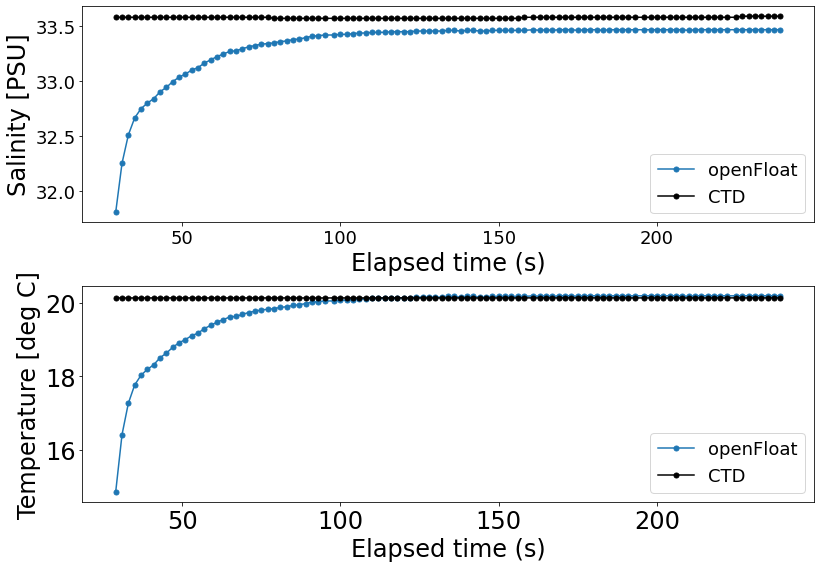

In [14]:
fontsize=24
fig, axs = plt.subplots(2,1, figsize=(11.5, 8))
corrected = True

if corrected:
   sal_est = [31.9596,
   32.4078,
   32.6664,
   32.8217,
   32.9060,
   32.9570,
   32.9969,
   33.0599,
   33.1003,
   33.1524,
   33.1930,
   33.2222,
   33.2573,
   33.2807,
   33.3220,
   33.3514,
   33.3810,
   33.4047,
   33.4285,
   33.4345,
   33.4523,
   33.4703,
   33.4823,
   33.4942,
   33.5002,
   33.5062,
   33.5181,
   33.5241,
   33.5361,
   33.5422,
   33.5542,
   33.5663,
   33.5723,
   33.5784,
   33.5784,
   33.5844,
   33.5844,
   33.5904,
   33.5965,
   33.5965,
   33.6025,
   33.6026,
   33.6025,
   33.6086,
   33.6086,
   33.6086,
   33.6086,
   33.6146,
   33.6146,
   33.6146,
   33.6146,
   33.6146,
   33.6207,
   33.6207,
   33.6146,
   33.6207,
   33.6207,
   33.6146,
   33.6146,
   33.6207,
   33.6206,
   33.6206,
   33.6206,
   33.6206,
   33.6206,
   33.6268,
   33.6207,
   33.6268,
   33.6206,
   33.6267,
   33.6266,
   33.6266,
   33.6205,
   33.6265,
   33.6265,
   33.6265,
   33.6204,
   33.6265,
   33.6265,
   33.6265,
   33.6265,
   33.6265,
   33.6265,
   33.6265,
   33.6265,
   33.6265,
   33.6265,
   33.6265,
   33.6265,
   33.6205,
   33.6266,
   33.6266,
   33.6266,
   33.6266,
   33.6266,
   33.6265,
   33.6266,
   33.6265,
   33.6265,
   33.6267,
   33.6267,
   33.6267,
   33.6266,
   33.6268]
   sal_est = gsw.SP_from_SA(sal_est, np.zeros(len(sal_est))+press_true, -122.48, 47.43)#*0.966557124
   # sal_est = [round(sal_est[i], 2) for i in range(len(sal_est))]
   sal_est = np.array(sal_est)

   print('float mean sal: ',np.mean(sal_est[36:]))
   print('float sal std dev: ', np.std(sal_est[36:]))
   print()
   print('YSI mean sal: ',np.mean(ysi_df['Sal_psu'][0:len(sal_est)]*0.966557124))
   print('YSI sal std dev: ', np.std(ysi_df['Sal_psu'][0:len(sal_est)]*0.966557124))
   print()
   print('float mean temp: ', np.mean(float_df[' temperature'][36:]-0.1628197214416928))
   print('float temp std dev: ', np.std(float_df[' temperature'][36:]-0.1628197214416928))
   print()
   print('YSI mean temp: ',np.mean(ysi_df['Temp_C'][36:]))
   print('YSI temp std dev: ', np.std(ysi_df['Temp_C'][36:]))
   print()
   print('float - YSI mean sal: ',np.mean(sal_est-ysi_df['Sal_psu'][0:len(sal_est)]*0.966557124))
   print('float - ysi sal std dev: ', np.std(sal_est-ysi_df['Sal_psu'][0:len(sal_est)]*0.966557124))
   print()
   print('float - YSI equil mean sal: ',np.mean(sal_est[36:] - ysi_df['Sal_psu'][36:len(sal_est)]*0.966557124))
   print('float - ysi equil sal std dev: ', np.std(sal_est[36:] - ysi_df['Sal_psu'][36:len(sal_est)]*0.966557124))
   print()
   print('float - YSI equil mean temp: ',np.mean((float_df[' temperature'][36:]-0.1628197214416928) - ysi_df['Temp_C'][36:len(sal_est)]))
   print('float - YSI equil temp std dev: ',np.std((float_df[' temperature'][36:]-0.1628197214416928) - ysi_df['Temp_C'][36:len(sal_est)]))

   axs[0].plot(float_df['time'], np.array(sal_est), marker='.', markersize=10, label='openFloat')
   axs[0].plot(float_df['time'], ysi_df['Sal_psu'][0:len(sal_est)]*0.966557124, marker='.', markersize=10, c='k',label='CTD')
   axs[0].set_ylabel("Salinity [PSU]", fontsize=fontsize)
   axs[0].set_xlabel("Elapsed time (s)", fontsize=fontsize)

   axs[0].tick_params(labelsize=18)
   axs[0].legend(fontsize=18, loc='best')
   # print(float_df['temperature'])
   axs[1].plot(float_df['time'], float_df[' temperature']-0.1628197214416928, marker='.', markersize=10,label='openFloat')
   axs[1].plot(float_df['time'], ysi_df['Temp_C'][0:len(sal_est)], marker='.', markersize=10,c='k',label='CTD')
   axs[1].set_ylabel("Temperature [deg C]", fontsize=fontsize)
   axs[1].set_xlabel("Elapsed time (s)", fontsize=fontsize)
   axs[1].tick_params(labelsize=fontsize)
   axs[1].legend(fontsize=18, loc='lower right')

   print(ysi_df['Sal_psu'][0:len(sal_est)]*0.966557124-sal_est)
   print(np.mean(ysi_df['Temp_C']))
   print(np.mean(ysi_df['Sal_psu'][0:len(sal_est)]*0.966557124))
   # fig.suptitle("Salinity calc with semi-corrected temp", fontsize=18)
   plt.tight_layout()
   plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/openFloatSal.png')
   plt.show()
else:
   sal_est= [32.0048,
   32.4565,
   32.7170,
   32.8733,
   32.9582,
   33.0095,
   33.0497,
   33.1131,
   33.1538,
   33.2062,
   33.2471,
   33.2764,
   33.3117,
   33.3353,
   33.3768,
   33.4065,
   33.4362,
   33.4601,
   33.4840,
   33.4900,
   33.5080,
   33.5260,
   33.5381,
   33.5501,
   33.5562,
   33.5622,
   33.5741,
   33.5802,
   33.5923,
   33.5984,
   33.6105,
   33.6226,
   33.6287,
   33.6348,
   33.6348,
   33.6408,
   33.6408,
   33.6469,
   33.6530,
   33.6530,
   33.6591,
   33.6591,
   33.6591,
   33.6652,
   33.6651,
   33.6652,
   33.6652,
   33.6713,
   33.6713,
   33.6712,
   33.6712,
   33.6713,
   33.6773,
   33.6774,
   33.6713,
   33.6773,
   33.6774,
   33.6713,
   33.6712,
   33.6774,
   33.6773,
   33.6773,
   33.6772,
   33.6772,
   33.6772,
   33.6835,
   33.6774,
   33.6834,
   33.6773,
   33.6834,
   33.6833,
   33.6833,
   33.6771,
   33.6832,
   33.6832,
   33.6832,
   33.6771,
   33.6832,
   33.6832,
   33.6832,
   33.6832,
   33.6832,
   33.6832,
   33.6832,
   33.6832,
   33.6832,
   33.6832,
   33.6832,
   33.6832,
   33.6771,
   33.6833,
   33.6833,
   33.6833,
   33.6833,
   33.6833,
   33.6832,
   33.6833,
   33.6832,
   33.6832,
   33.6834,
   33.6834,
   33.6834,
   33.6833,
   33.6835]
   sal_est = gsw.SP_from_SA(sal_est, np.zeros(len(sal_est))+press_true, -122.48, 47.43)
   sal_est = [round(sal_est[i], 2) for i in range(len(sal_est))]

   axs[0].plot(float_df['time'], np.array(sal_est), marker='.', markersize=10, label='openFloat')
   axs[0].plot(float_df['time'], ysi_df['Sal_psu'][0:len(sal_est)]*0.966557124, marker='.', markersize=10, c='k',label='CTD')
   axs[0].set_ylabel("Salinity [g/kg]", fontsize=fontsize)
   axs[0].set_xlabel("Elapsed time (s)", fontsize=fontsize)

   axs[0].tick_params(labelsize=18)
   axs[0].legend(fontsize=16, loc='best')
   # print(float_df['temperature'])
   axs[1].plot(float_df['time'], float_df[' temperature'], marker='.', markersize=10, label='openFloat')
   axs[1].plot(float_df['time'], ysi_df['Temp_C'][0:len(sal_est)], marker='.', markersize=10, c='k',label='CTD')
   axs[1].set_ylabel("Temperature [deg C]", fontsize=fontsize)
   axs[1].set_xlabel("Elapsed time (s)", fontsize=fontsize)
   axs[1].tick_params(labelsize=fontsize)
   axs[1].legend(fontsize=fontsize-5, loc='lower right')

   fig.suptitle("Salinity calc with uncorrected temp", fontsize=fontsize)
   print(ysi_df['Sal_psu']-sal_est)
   print(np.mean(ysi_df['Temp_C']))
   print(np.mean(ysi_df['Sal_psu'][0:len(sal_est)]*0.966557124))
   plt.tight_layout()
   # plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/openFloatSal.tiff')
   plt.savefig('/Users/calebflaim/Documents/thesis/openFloat_thesis/plots/presentation/openFloatSal.png')

   plt.show()
